In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ExifTags
import datetime as dt
import pandas as pd
from lxml import etree
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# these are routines to convert back and forth from datetime to Matlab datenum
def matlabdn2datetime(dn):
    """http://stackoverflow.com/questions/13965740/converting-matlabs-datenum-format-to-python"""
    day = dt.datetime.fromordinal(int(dn))
    dayfrac = dt.timedelta(days=dn%1) - dt.timedelta(days = 366)
    return day + dayfrac

def datetime2matlabdn(dtn):
   '''http://stackoverflow.com/questions/8776414/python-datetime-to-matlab-datenum'''
   mdn = dtn + dt.timedelta(days = 366)
   frac_seconds = (dtn-dt.datetime(dtn.year,dtn.month,dtn.day,0,0,0)).seconds / (24.0 * 60.0 * 60.0)
   frac_microseconds = dtn.microsecond / (24.0 * 60.0 * 60.0 * 1000000.0)
   return mdn.toordinal() + frac_seconds + frac_microseconds

dtn=dt.datetime(2012, 2, 13, 6, 56, 2, 619000)
dn=datetime2matlabdn(dtn)
dtn2 = matlabdn2datetime(dn)
dn2 =datetime2matlabdn(dtn2)
print(dtn2,dn,dn2)
print(dtn+dt.timedelta(minutes=5.))

(datetime.datetime(2012, 2, 13, 6, 56, 2, 618997), 734912.2889192014, 734912.2889192014)
2012-02-13 07:01:02.619000


In [3]:
# This is where the elements of the xml (gpx) file are defined
namespace = {'def': 'http://www.topografix.com/GPX/1/1'}

# get list of .gpx files the requested path (I have them in another folder at the same level on my laptop)
path = '../uas'
# but on my desktop, they are in the same folder
path = './'
glist=[os.path.join(path,g) for g in os.listdir(path) if ( g.endswith('.gpx') or g.endswith('.GPX'))]
print(glist)

['./solo2.gpx', './solo3.gpx', './solo4.gpx', './solo5.gpx', './solo6.gpx', './solo7.gpx', './solo9.gpx']


In [4]:
#parse the gpx file and report start and end time
#TODO - Do something more useful with the time zone info
for f in glist:
    tree = etree.parse(f)
    elist = tree.xpath('./def:trk//def:trkpt//def:time',namespaces=namespace)
    fmt = '%Y-%m-%dT%H:%M:%S-04:00' #2017-05-04T14:14:12-04:00
    time = [dt.datetime.strptime(e.text, fmt) for e in elist]
    print(f)
    print(time[0],time[-1], np.shape(time))

./solo2.gpx
(datetime.datetime(2017, 5, 4, 14, 14), datetime.datetime(2017, 5, 4, 14, 28, 38), (14466L,))
./solo3.gpx
(datetime.datetime(2017, 5, 4, 13, 52, 31), datetime.datetime(2017, 5, 4, 14, 14), (9911L,))
./solo4.gpx
(datetime.datetime(2017, 5, 4, 13, 29, 14), datetime.datetime(2017, 5, 4, 13, 52, 31), (7640L,))
./solo5.gpx
(datetime.datetime(2017, 5, 4, 13, 1, 35), datetime.datetime(2017, 5, 4, 13, 29, 13), (10633L,))
./solo6.gpx
(datetime.datetime(2017, 5, 4, 12, 41, 1), datetime.datetime(2017, 5, 4, 13, 1, 34), (8320L,))
./solo7.gpx
(datetime.datetime(2017, 5, 4, 12, 23, 21), datetime.datetime(2017, 5, 4, 12, 41, 1), (7790L,))
./solo9.gpx
(datetime.datetime(2017, 5, 4, 12, 3, 40), datetime.datetime(2017, 5, 4, 12, 18, 40), (8361L,))


In [5]:
# get a list of images files
#path = '..\uas'
path ='.'
flist=[os.path.join(path,f) for f in os.listdir(path) if ( f.endswith('.jpg') or f.endswith('.JPG'))]

# read and print the time stamp
for f in flist:
    t=Image.open(f)._getexif()[36867]
    print(f,t)

# this does the same thing but makes a datetime array   
fmt = '%Y:%m:%d %H:%M:%S' #2017-05-04T14:14:12-04:00
pictime = [dt.datetime.strptime(Image.open(f)._getexif()[36867], fmt) for f in flist]

('.\\U0001559.JPG', u'2017:04:28 14:08:15')


[ 41.7665767 -70.4834808]
(8361L, 2L)
(datetime.datetime(2017, 5, 4, 12, 3, 40), datetime.datetime(2017, 5, 4, 12, 18, 40), (8361L,))


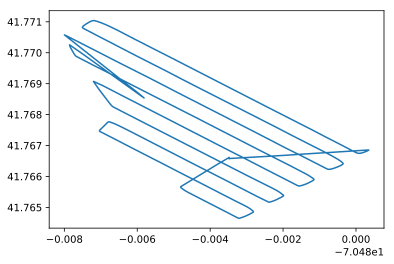

(4.7599999999999998, (8361L,))
(8361L, 0L)
(-0.070000000000000007, (8361L,))
(8361L, 0L)
('course: 0.0', (8361L,))
(8361L, 0L)
('roll: 0.0', (8361L,))
(8361L, 0L)
('pitch: 0.0', (8361L,))
(8361L, 0L)
('mode: Loiter', (8361L,))
(8361L, 0L)
2017-05-04 12:03:40, 41.7665767, -70.4834808, 4.76, -0.07, 0.0, 0.0, 0.0, Loiter
2017-05-04 12:03:41, 41.7665767, -70.4834809, 4.79, -0.04, 24.1631, -0.105444, 0.6091843, Loiter
2017-05-04 12:03:42, 41.7665767, -70.4834808, 4.83, 0.0, 24.10601, -0.1204517, 0.6254047, Loiter
2017-05-04 12:03:43, 41.7665767, -70.4834807, 4.86, 0.03, 24.06099, -0.153204, 0.6283249, Loiter
2017-05-04 12:03:46, 41.7665767, -70.4834806, 4.9, 0.0, 24.02701, -0.1869114, 0.6297004, Loiter
2017-05-04 12:03:47, 41.7665766, -70.4834805, 4.91, 0.01, 24.04045, -0.208447, 0.6877746, Loiter
2017-05-04 12:03:47, 41.7665765, -70.4834805, 4.91, 0.01, 24.05249, -0.2114993, 0.6670381, Loiter
2017-05-04 12:03:47, 41.7665764, -70.4834804, 4.91, 0.01, 24.05021, -0.2077543, 0.664567, Loiter
2

In [6]:
# Unpack the .gpx file written by MissionPlanner
elist = tree.xpath('./def:trk//def:trkpt',namespaces=namespace)
lonlat = [e.values() for e in elist]
lonlat = np.array(lonlat,dtype="float")
print(lonlat[0])
print(np.shape(lonlat))

# This works
elist = tree.xpath('./def:trk//def:trkpt//def:time',namespaces=namespace)
fmt = '%Y-%m-%dT%H:%M:%S-04:00' #2017-05-04T14:14:12-04:00
time = [dt.datetime.strptime(e.text, fmt) for e in elist]
print(time[0],time[-1], np.shape(time))

# make a bare-bones trackline plot
plt.plot(lonlat[:,1],lonlat[:,0])
plt.show()

# The same thing works for other elements in a trkpt
elist = tree.xpath('./def:trk//def:trkpt//def:ele',namespaces=namespace)
ele = np.array([float(e.text) for e in elist])
print(ele[0], np.shape(ele))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:ele2',namespaces=namespace)
ele2 = np.array([float(e.text) for e in elist])
print(ele2[0], np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:course',namespaces=namespace)
course = np.array([float(e.text) for e in elist])
print("course: {}".format(course[0]), np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:roll',namespaces=namespace)
roll = np.array([float(e.text) for e in elist])
print("roll: {}".format(roll[0]), np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:pitch',namespaces=namespace)
pitch = np.array([float(e.text) for e in elist])
print("pitch: {}".format(pitch[0]), np.shape(ele2))
print(np.shape(elist))

elist = tree.xpath('./def:trk//def:trkpt//def:mode',namespaces=namespace)
mode = [e.text for e in elist]
print("mode: {}".format(mode[0]), np.shape(ele2))
print(np.shape(elist))

#TODO - make sure all of those arrays are the same length

# print data extracted from .gpx file
for i in range(10):
    print("{}, {}, {}, {}, {}, {}, {}, {}, {}".format(time[i],lonlat[i,0],lonlat[i,1],ele[i],ele2[i],course[i],roll[i],pitch[i],mode[i]))